# Image classification datasets

Notebook references: 

* [Fashion MNIST](https://d2l.ai/chapter_linear-classification/image-classification-dataset.html#sec-fashion-mnist)

Terminology:

* PIL: Python Imaging Library [Pillow](https://pillow.readthedocs.io/en/stable/index.html)
* PIL images have dimensions H(eight) x W(idth) x C(hannel)
* PyTorch works with tensors
* Tensors have the shape C(hannel) x H(eight) x W(idth)

## Import and plot an image using pillow

In [2]:
! python -m ipykernel install --user --name=d2l

import sys
sys.executable

from PIL import Image

Installed kernelspec d2l in /home/hendrik/.local/share/jupyter/kernels/d2l


In [2]:
img = Image.open('./cv_augmentation_data/cat.jpeg')
print(img.format, img.size, img.mode)

JPEG (275, 183) RGB


In [ ]:
# img.show() # PIL Image method, opens a new window
display(img) # jupyter built in method, same as img as last line

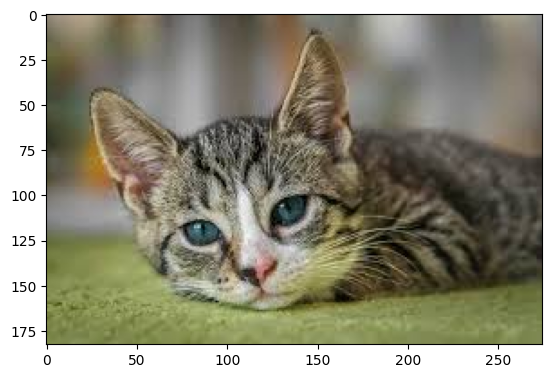

In [7]:
from matplotlib.pyplot import imshow
import numpy as np

imshow(np.asarray(img));

In [1]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

## Fashion MNIST

* images of 10 categories of clothing
* 6000 images per category for training
* 1000 images per category for testing
* resolution of 28 x 28 pixels

Define a class to download and save the Fashion MNIST dataset. 

In [11]:
class FashionMNIST(d2l.DataModule): 
    """The Fashion-MNIST dataset."""
    def __init__(
        self
        , root = './cv_datasets_data/'
        , batch_size = 64
        , resize = (28, 28)
    ):
        
        super().__init__()
        
        self.save_hyperparameters()
        
        trans = torchvision.transforms.Compose(
            [torchvision.transforms.Resize(resize)
             , torchvision.transforms.ToTensor()
        ])
        
        self.train = torchvision.datasets.FashionMNIST(
            root = self.root
            , train = True
            , transform = trans
            , download = True
        )
        
        self.val = torchvision.datasets.FashionMNIST(
            root = self.root
            , train = False
            , transform = trans
            , download = True
        )

In [ ]:
data = FashionMNIST();
print('Data downloaded to', data.root)

In [31]:
len(data.train), len(data.val)

(60000, 10000)

In [32]:
@d2l.add_to_class(FashionMNIST)  
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [33]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(
        data
        , self.batch_size
        , shuffle = train
        , num_workers=self.num_workers
    )

In [37]:
data.val

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./cv_datasets_data/
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [39]:
# X, y = next(iter(data.val_dataloader()))
data.val_dataloader()
# print(X.shape, X.dtype, y.shape, y.dtype)

In [40]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

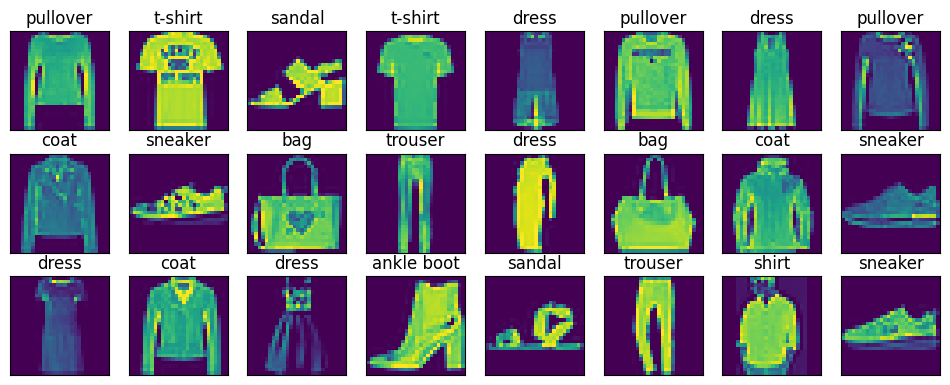

In [43]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows = 1, ncols = 8, labels = []):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles = labels)
batch = next(iter(data.train_dataloader()))
data.visualize(batch, 3, 8)

In [47]:
numbers = [1, 2, 3, 4, 5]
num_iter = iter(numbers)

In [48]:
type(num_iter)

list_iterator

In [ ]:
# Accessing elements one by one
print(next(num_iter))  # Output: 1
print(next(num_iter))  # Output: 2
# and so on until...
print(next(num_iter))  # Output: 5

# Attempting to access the next element will raise a StopIteration error
print(next(num_iter))  # Raises a StopIteration error

In [52]:
i = iter(data.train_dataloader())
type(i)

torch.utils.data.dataloader._MultiProcessingDataLoaderIter

In [97]:
class mnist():
    
    def __init__(self, root = './data'):
        self.train = torchvision.datasets.MNIST(
            root = root
            , train = True
            , download = True
        )

        self.test = torchvision.datasets.MNIST(
            root = root
            , train = False
            , download = True
        )

    def getitem(self, index, train = True):
        dat = self.train[index] if train else self.test[index]
        return dat[0], dat[1]

In [98]:
data = mnist(root = './cv_datasets_data/')

In [99]:
len(data.test), len(data.train)

(10000, 60000)

In [103]:
img = data.getitem(1, train=False)[0]
type(img)

PIL.Image.Image

In [105]:
timg = torchvision.transforms.functional.pil_to_tensor(img)

In [106]:
timg.shape

torch.Size([1, 28, 28])

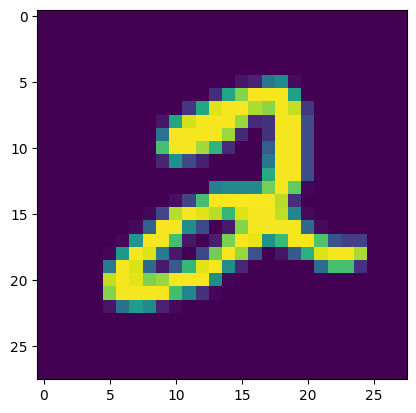

In [92]:
d2l.plt.imshow(data[5][0])